In [82]:
import numpy as np
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV
import pandas as pd
from src.data.make_dataset import make_dataset
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import DictVectorizer
from flair.data import Sentence
from flair.models import SequenceTagger

In [83]:
tagger = SequenceTagger.load("qanastek/pos-french")
input_filename=("../data/raw/train.csv")

df_base = make_dataset(input_filename)
df_base

2023-11-05 23:18:55,870 SequenceTagger predicts: Dictionary with 69 tags: <unk>, O, DET, NFP, ADJFP, AUX, VPPMS, ADV, PREP, PDEMMS, NMS, COSUB, PINDMS, PPOBJMS, VERB, DETFS, NFS, YPFOR, VPPFS, PUNCT, DETMS, PROPN, ADJMS, PPER3FS, ADJFS, COCO, NMP, PREL, PPER1S, ADJMP, VPPMP, DINTMS, PPER3MS, PPER3MP, PREF, ADJ, DINTFS, CHIF, XFAMIL, PRELFS, SYM, NOUN, MOTINC, PINDFS, PPOBJMP, NUM, PREFP, PDEMFS, VPPFP, PPER3FP


,Unnamed: 0,video_name,is_name,is_comic,comic_name,tokens
0,0,Le Barbecue Disney - La chanson de Frédéric Fr...,"[0, 0, 0, 0, 0, 0, 0, 1, 1]",1,"[""Frédéric Fromet""]","[""Le"", ""Barbecue"", ""Disney"", ""-"", ""La"", ""chans..."
1,1,Le Roi et l'Oiseau - La Chronique de Christine...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]",1,"[""Christine Gonzalez""]","[""Le"", ""Roi"", ""et"", ""l'"", ""Oiseau"", ""-"", ""La"",..."
2,2,L'amour du lac - La chronique d'Hippolyte Gira...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1]",1,"[""Hippolyte Girardot""]","[""L'"", ""amour"", ""du"", ""lac"", ""-"", ""La"", ""chron..."
3,3,La fille de la piscine de Léa Tourret - La chr...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]",0,[],"[""La"", ""fille"", ""de"", ""la"", ""piscine"", ""de"", ""..."
4,4,"""Le soleil va moins faire son malin quand Jean...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",0,[],"[""\""Le"", ""soleil"", ""va"", ""moins"", ""faire"", ""so..."
...,...,...,...,...,...,...
994,994,Au Ces de Las Vegas des innovations à gogo et ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,[],"[""Au"", ""Ces"", ""de"", ""Las"", ""Vegas"", ""des"", ""in..."
995,995,Le questionnaire Jupiproust de Frédérique Matonti,"[0, 0, 0, 0, 0, 0]",1,[],"[""Le"", ""questionnaire"", ""Jupiproust"", ""de"", ""F..."
996,996,Raphael - La Nuit N'en Finit Plus (cover),"[0, 0, 0, 0, 0, 0, 0, 0, 0]",0,[],"[""Raphael"", ""-"", ""La"", ""Nuit"", ""N'"", ""en"", ""Fi..."
997,997,Des sachets de drogue estampillés Haribeu sais...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,[],"[""Des"", ""sachets"", ""de"", ""drogue"", ""estampill\..."


In [84]:
df_base["is_name"] = df_base["is_name"].apply(eval)
df_base["tokens"] = df_base["tokens"].apply(eval)
df_base

,Unnamed: 0,video_name,is_name,is_comic,comic_name,tokens
0,0,Le Barbecue Disney - La chanson de Frédéric Fr...,"[0, 0, 0, 0, 0, 0, 0, 1, 1]",1,"[""Frédéric Fromet""]","[Le, Barbecue, Disney, -, La, chanson, de, Fré..."
1,1,Le Roi et l'Oiseau - La Chronique de Christine...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]",1,"[""Christine Gonzalez""]","[Le, Roi, et, l', Oiseau, -, La, Chronique, de..."
2,2,L'amour du lac - La chronique d'Hippolyte Gira...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1]",1,"[""Hippolyte Girardot""]","[L', amour, du, lac, -, La, chronique, d', Hip..."
3,3,La fille de la piscine de Léa Tourret - La chr...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]",0,[],"[La, fille, de, la, piscine, de, Léa, Tourret,..."
4,4,"""Le soleil va moins faire son malin quand Jean...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",0,[],"[""Le, soleil, va, moins, faire, son, malin, qu..."
...,...,...,...,...,...,...
994,994,Au Ces de Las Vegas des innovations à gogo et ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,[],"[Au, Ces, de, Las, Vegas, des, innovations, à,..."
995,995,Le questionnaire Jupiproust de Frédérique Matonti,"[0, 0, 0, 0, 0, 0]",1,[],"[Le, questionnaire, Jupiproust, de, Frédérique..."
996,996,Raphael - La Nuit N'en Finit Plus (cover),"[0, 0, 0, 0, 0, 0, 0, 0, 0]",0,[],"[Raphael, -, La, Nuit, N', en, Finit, Plus, (c..."
997,997,Des sachets de drogue estampillés Haribeu sais...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,[],"[Des, sachets, de, drogue, estampillés, Haribe..."


In [86]:
def pos_tagging(phrase, is_name):
    result = pd.DataFrame(columns=['words', 'tags'])
    for i in range(len(phrase)):
        word = phrase[i]

        if(word):
            sentence = Sentence(word)
            tagger.predict(sentence)
        
            # First word : <s> (starting)
            word = word + "<s>" if i == 0 else word
            # Last word : <e> (end)
            word = word + "<e>" if i == (len(phrase) - 1) else word
            # Capitalized word : <c> (caps)
            word = word + "<c>" if len(word.replace('"', '').strip()) > 0 and (word.replace('"', '').strip())[0].isupper() else word
        
            values = pd.DataFrame([{'words': word, 'tags': sentence.tag}])
                
            result = pd.concat([result, values], axis=0, ignore_index=True)
        
    result['is_name'] = pd.DataFrame({'is_name': is_name})
    
    return(result)

In [87]:
df = pd.DataFrame(columns=['words', 'tags', 'is_name'])

for i in df_base.index:
    tokens = df_base.loc[i, 'tokens']
    names = [int(i) for i in df_base.loc[i, 'is_name']]
    result = pos_tagging(tokens, names)
    df = pd.concat([df, result], axis=0, ignore_index=True)
    
df

,words,tags,is_name
0,Le<s><c>,DETMS,0
1,Barbecue<c>,NMS,0
2,Disney<c>,PROPN,0
3,-,PUNCT,0
4,La<c>,DETFS,0
...,...,...,...
12285,Bd<c>,PROPN,0
12286,Fnac<c>,PROPN,0
12287,France<c>,PROPN,0
12288,Inter<c>,PROPN,0


In [88]:
counting = df.groupby('tags').size().reset_index(name='counts')
counting

,tags,counts
0,ADJ,31
1,ADJFP,56
2,ADJFS,297
3,ADJMP,96
4,ADJMS,137
5,ADV,370
6,AUX,142
7,CHIF,114
8,COCO,202
9,COSUB,68


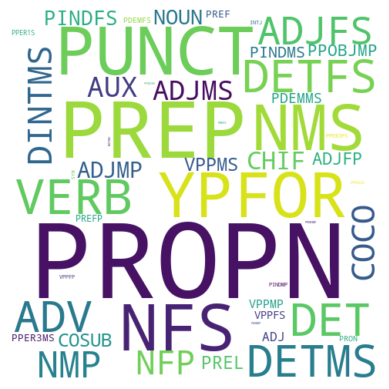

In [89]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=480, height=480, background_color="white").generate_from_frequencies(dict([tuple(x) for x in counting.values]))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [90]:
X = df.drop('is_name', axis=1)
y = df.is_name.values

X

,words,tags
0,Le<s><c>,DETMS
1,Barbecue<c>,NMS
2,Disney<c>,PROPN
3,-,PUNCT
4,La<c>,DETFS
...,...,...
12285,Bd<c>,PROPN
12286,Fnac<c>,PROPN
12287,France<c>,PROPN
12288,Inter<c>,PROPN


In [91]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

In [93]:
X.shape, y.shape

((12290, 2), (12290,))

GradientBoostingClassifier

In [94]:
pipeline = Pipeline([
            ("vectorizer", DictVectorizer(sparse=False)),
            ("classifier", GradientBoostingClassifier(n_estimators=150, criterion='squared_error')),
        ])

In [ ]:
results = cross_validate(pipeline, X.to_dict('records'), y.astype(int), scoring="accuracy", cv=10, return_estimator=True)

In [ ]:
scores = results["test_score"]

print(f"Accuracy per fold : {scores}")
print(f"Global accuracy {100 * np.mean(scores)}% + {np.std(scores)}")

RandomForestClassifier

In [10]:
pipeline_rf = Pipeline([
            ("vectorizer", DictVectorizer(sparse=False)),
            ("classifier", RandomForestClassifier()),
        ])

In [57]:
results_rf = cross_validate(pipeline_rf, X.to_dict('records'), y.astype(int), scoring="accuracy", cv=10, return_estimator=True)
scores_rf = results_rf["test_score"]

In [58]:
print(f"Accuracy per fold : {scores_rf}")
print(f"Global accuracy {100 * np.mean(scores_rf)}% + {np.std(scores_rf)}")

Accuracy per fold : [0.96663954 0.97884459 0.96094386 0.95524817 0.96094386 0.95606184
 0.95768918 0.95850285 0.95687551 0.95362083]
Global accuracy 96.05370219690805% + 0.007030124611974894


Test without starting, ending and capital tags

In [16]:
def pos_tagging_simple(phrase, is_name):
    result = pd.DataFrame(columns=['words', 'tags'])
    for i in range(len(phrase)):
        word = phrase[i]

        if (word):
            sentence = Sentence(word)
            tagger.predict(sentence)
            values = pd.DataFrame([{'words': word, 'tags': sentence.tag}])
            result = pd.concat([result, values], axis=0, ignore_index=True)

    result['is_name'] = pd.DataFrame({'is_name': is_name})

    return (result)

In [17]:
df_simple = pd.DataFrame(columns=['words', 'tags', 'is_name'])

for i in df_base.index:
    tokens = df_base.loc[i, 'tokens']
    names = [int(i) for i in df_base.loc[i, 'is_name']]
    result = pos_tagging_simple(tokens, names)
    df_simple = pd.concat([df_simple, result], axis=0, ignore_index=True)

In [65]:
df_simple

,words,tags,is_name
0,Le,DETMS,0
1,Barbecue,NMS,0
2,Disney,PROPN,0
3,-,PUNCT,0
4,La,DETFS,0
...,...,...,...
12285,Bd,PROPN,0
12286,Fnac,PROPN,0
12287,France,PROPN,0
12288,Inter,PROPN,0


In [34]:
X_simple = df_simple.drop('is_name', axis=1).to_dict('records')

In [19]:
y_simple = df_simple.is_name.values.astype(int)

In [59]:
results_rf_2 = cross_validate(pipeline_rf, X_simple, y_simple, scoring="accuracy", cv=10, return_estimator=True)
scores_rf_2 = results_rf_2["test_score"]

In [60]:
print(f"Accuracy per fold : {scores_rf_2}")
print(f"Global accuracy {100 * np.mean(scores_rf_2)}% + {np.std(scores_rf_2)}")

Accuracy per fold : [0.96826688 0.97477624 0.96175753 0.95768918 0.96175753 0.95687551
 0.95362083 0.9625712  0.95199349 0.95362083]
Global accuracy 96.0292921074044% + 0.0067764565707589906


Adding stemming

In [23]:
from nltk.stem.snowball import FrenchStemmer
stemmer = FrenchStemmer()
    
def pos_tagging_st(phrase, is_name):
    result = pd.DataFrame(columns=['words', 'tags'])
    for i in range(len(phrase)):
        word = phrase[i]

        if(word):
            sentence = Sentence(word)
            tagger.predict(sentence)
            word_st = stemmer.stem(word)
        
            # First word : <s> (starting)
            word_st = word_st + "<s>" if i == 0 else word_st
            # Last word : <e> (end)
            word_st = word_st + "<e>" if i == (len(phrase) - 1) else word_st
            # Capitalized word : <c> (caps)
            word_st = word_st + "<c>" if len(word.replace('"', '').strip()) > 0 and (word.replace('"', '').strip())[0].isupper() else word_st
        
            values = pd.DataFrame([{'words': word_st, 'tags': sentence.tag}])
            
            result = pd.concat([result, values], axis=0, ignore_index=True)
        
    result['is_name'] = pd.DataFrame({'is_name': is_name})
    
    return(result)

In [24]:
df_st = pd.DataFrame(columns=['words', 'tags', 'is_name'])

for i in df_base.index:
    tokens = df_base.loc[i, 'tokens']
    names = [int(i) for i in df_base.loc[i, 'is_name']]
    result = pos_tagging_st(tokens, names)
    df_st = pd.concat([df_st, result], axis=0, ignore_index=True)

In [28]:
df_st.tail()

,words,tags,is_name
12285,bd<c>,PROPN,0
12286,fnac<c>,PROPN,0
12287,franc<c>,PROPN,0
12288,inter<c>,PROPN,0
12289,2022<e>,CHIF,0


In [25]:
X_st = df_st.drop('is_name', axis=1).to_dict('records')
y_st = df_st.is_name.values.astype(int)

In [61]:
results_rf_3 = cross_validate(pipeline_rf, X_st, y_st, scoring="accuracy", cv=10, return_estimator=True)
scores_rf_3 = results_rf_3["test_score"]

In [62]:
print(f"Accuracy per fold : {scores_rf_3}")
print(f"Global accuracy {100 * np.mean(scores_rf_3)}% + {np.std(scores_rf_3)}")

Accuracy per fold : [0.96582587 0.97965826 0.96013019 0.95524817 0.96013019 0.95768918
 0.95768918 0.95850285 0.95524817 0.95036615]
Global accuracy 96.00488201790073% + 0.007558373546367055


Stemming without starting, ending and capital tags

In [38]:
def pos_tagging_simple_st(phrase, is_name):
    result = pd.DataFrame(columns=['words', 'tags'])
    for i in range(len(phrase)):
        word = phrase[i]
        word_st = stemmer.stem(word)

        if (word):
            sentence = Sentence(word)
            tagger.predict(sentence)
            values = pd.DataFrame([{'words': word_st, 'tags': sentence.tag}])
            result = pd.concat([result, values], axis=0, ignore_index=True)

    result['is_name'] = pd.DataFrame({'is_name': is_name})

    return (result)

In [39]:
df_simple_st = pd.DataFrame(columns=['words', 'tags', 'is_name'])

for i in df_base.index:
    tokens = df_base.loc[i, 'tokens']
    names = [int(i) for i in df_base.loc[i, 'is_name']]
    result = pos_tagging_simple_st(tokens, names)
    df_simple_st = pd.concat([df_simple_st, result], axis=0, ignore_index=True)

In [40]:
X_simple_st = df_simple_st.drop('is_name', axis=1).to_dict('records')
y_simple_st = df_simple_st.is_name.values.astype(int)

In [63]:
results_rf_4 = cross_validate(pipeline_rf, X_simple_st, y_simple_st, scoring="accuracy", cv=10, return_estimator=True)
scores_rf_4 = results_rf_4["test_score"]

In [64]:
print(f"Accuracy per fold : {scores_rf_4}")
print(f"Global accuracy {100 * np.mean(scores_rf_4)}% + {np.std(scores_rf_4)}")

Accuracy per fold : [0.96663954 0.97558991 0.96582587 0.95768918 0.95931652 0.95931652
 0.95524817 0.96175753 0.95036615 0.95117982]
Global accuracy 96.02929210740439% + 0.007230222910178364


Trying KFold

In [55]:
from sklearn.model_selection import KFold

results_rf_5 = cross_validate(pipeline_rf, X_simple_st, y_simple_st, scoring="accuracy", cv=KFold(n_splits=10, shuffle=True), return_estimator=True)
scores_rf_5 = results_rf_5["test_score"]

In [56]:
print(f"Accuracy per fold : {scores_rf_5}")
print(f"Global accuracy {100 * np.mean(scores_rf_5)}% + {np.std(scores_rf_5)}")

Accuracy per fold : [0.96013019 0.95768918 0.96175753 0.97070789 0.96663954 0.96826688
 0.95687551 0.96419854 0.96013019 0.96338487]
Global accuracy 96.29780309194467% + 0.0043093776002816435
